# Perceptron

Lembrando que para calcular os pesos se faz a operação $[\sum_{i=0}^{n} (Xi+Wi)] + b$ esta operação lembra uma muito conhecida, a operação de multiplicação de matrizes.

Numpy faz operação de matrizes em python melhor que qualquer codigo escrito empython puro, e de forma simples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### uma forma de criar matrizes em numpy

In [2]:
inputN = 2
neurons = 3

WL1 = []
for i in range(inputN):
    WL1.append([])
    for j in range(neurons):
        WL1[i].append(random.random()*10 -20)
        
WL1 = np.array(WL1)
WL1

array([[-17.73058907, -15.62012175, -11.81913718],
       [-15.5623643 , -18.92939185, -18.30052028]])

In [3]:
def createLayer(nin,nout):
    tmp = []
    for i in range(nin):
        tmp.append([])
        for j in range(nout):
            tmp[i].append(random.random()*10 -20)
    return np.array(tmp)
WL1 = createLayer(1,3)
WL2 = createLayer(3,1)
WL1.shape

(1, 3)

## Funções para a perceptron

In [4]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [5]:
def createSamples(list1, list2, label, bias = False):
    random.shuffle(list1)
    random.shuffle(list2)
    tmp = []
    for p1, p2 in zip(list1, list2):
        if bias:
            tmp.append([p1, p2, 1, label])
        else:
            tmp.append([p1, p2, label])
    return tmp

### Criando uma base de dados maior

In [6]:
qte_sample = 30
itemsx = []
itemsy = []

for i in range(qte_sample):
    itemsy.append(random.random()*5+5)
    itemsx.append(random.random()*15)

rosas = createSamples(itemsx, itemsy, 0, True)

In [7]:
qte_sample = 30
itemsx = []
itemsy = []

for i in range(qte_sample):
    itemsy.append(random.random()*5)
    itemsx.append(random.random()*15+15)
    
violetas = createSamples(itemsx, itemsy, 1, True)

In [8]:
points = np.array(rosas + violetas)

np.take(points,np.random.permutation(points.shape[0]),axis=0,out=points)

# 2 is bias
valor = points[:,3]
points = points[:,[0,1,2]]
# Normalizando
points[:,0] *= 1/30
points[:,1] *= 1/10

## Função de predição com numpy

In [9]:
def predict(X):
    X = np.array(X)
    W = WL1    
    return sigmoid(W.dot(X.T)[0]) 

## Função de treinamento com Numpy

In [10]:
lr = 0.5

def d_sigmoid(x):
    return x * (1-x)

def treinaPerceptron(points, valor):
    global WL1
    for x_train, y_train in zip(points, valor):
        e = y_train - predict(x_train)
        tmp = []
        for i in range(WL1.shape[1]):
            tmp.append(lr*e*d_sigmoid(x_train[i]))
        tmp = np.array(tmp)
        WL1 = WL1 + tmp
        
treinaPerceptron(points, valor)
WL1

array([[-16.35014772, -10.80658194, -17.73914933]])

## Visualiza perceptron

In [11]:
def visualiza(points, valor, zero1=False):
    img = np.ones((300, 400)) 
    # grab the image dimensions
    w = img.shape[0]
    h = img.shape[1]

    if zero1:
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
                if (predict([x/w, y/h, 1]) > 0.5):
                    img[x][y] = 1
                else:
                    img[x][y] = 0 
    else:
        # loop over the image, pixel by pixel
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
                img[x][y] = predict([x/w, y/h, 1])
    
    plt.imshow(img, origin='lower')
    plt.colorbar()
    for x, y in zip(points,valor):
        if y == 1:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='r', s=40)
        else:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='b', s=40)
    plt.show()

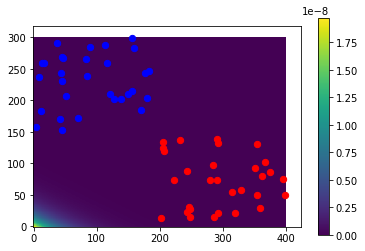

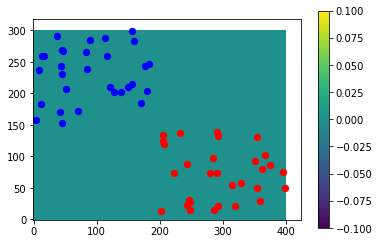

array([[-16.35014772, -10.80658194, -17.73914933]])

In [12]:
visualiza(points, valor)
visualiza(points, valor, True)
WL1

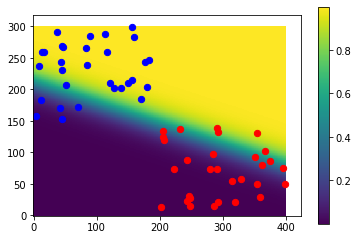

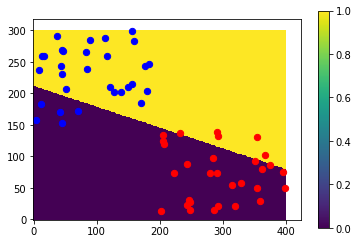

array([[ 25.17342031,  11.05875973, -17.73914933]])

In [21]:
for i in range(100):
    treinaPerceptron(points, valor)

visualiza(points, valor)
visualiza(points, valor, True)
WL1